In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import Sequential , models , layers
from keras.layers import Dense , LSTM
from keras.optimizers import Adam
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
link = '/content/airline-passengers.csv'
data = pd.read_csv(link)
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
print(data.shape)

(144, 2)


In [ ]:
print(data.columns)

Index(['Month', 'Passengers'], dtype='object')


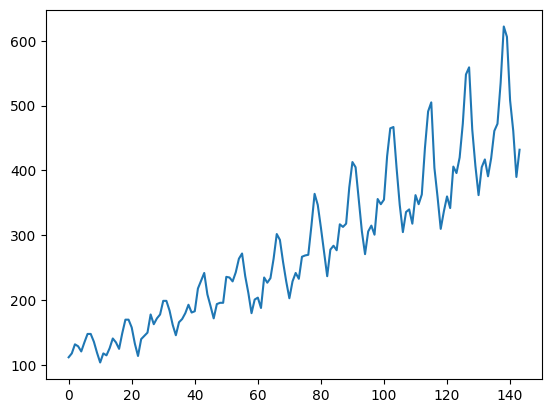

In [ ]:
x = data['Passengers']
x = np.asarray(x)

y =data['Month']

plt.plot(x)
plt.show()

In [ ]:
x = x.astype('float32')
scaler = MinMaxScaler()
x = scaler.fit_transform(x.reshape(-1,1))
#print(x)

In [ ]:

c = 0.67
train_size = int(len(x)*c)
test_size =int(len(x) - train_size)
print(train_size)
print(test_size)

xtrain = x[0:train_size,:]
xtest = x[train_size:len(x),:]
print(xtrain.shape)
print(xtest.shape)

96
48
(96, 1)
(48, 1)


In [ ]:

def create_data(x):
  data_x =[]
  data_y=[]
  for i in range(len(x)-2):
    # i+1 <=== time step

    data_x.append(x[i:i+1,0])
    data_y.append(x[i+1,0])
  data_x =np.asarray(data_x)
  data_y = np.asanyarray(data_y)
  return data_x ,data_y


x_train , y_train = create_data(xtrain)
x_test , y_test = create_data(xtest)


In [ ]:
print(x_train[0:6,:])
print(y_train[0:5]) # <== ytrain = xtrain+1

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]]
[0.02702703 0.05405405 0.04826255 0.03281853 0.05984557]


In [ ]:
# reshape inputro [samples, time steos, feature]
x_train = x_train.reshape(x_train.shape[0],1,1)
x_test = x_test.reshape(x_test.shape[0],1,1)
print(x_train.shape)
print(x_test.shape)

(94, 1, 1)
(46, 1, 1)


In [ ]:
model = Sequential()
model.add(LSTM(10 ,input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer=Adam(0.001))
output_fit = model.fit(x_train,y_train,epochs=100,batch_size=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0626
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0331
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0110
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081
Epoch 13/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046
Epoch 14/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
Epoch 15/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038
Epoch 16/100
94/

In [ ]:
print(output_fit.history.keys())

dict_keys(['loss'])


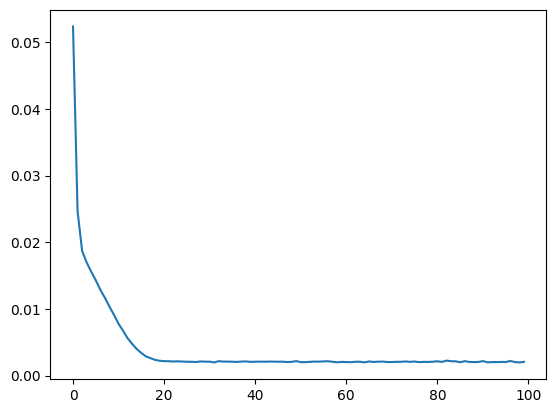

In [ ]:
plt.plot(output_fit.history['loss'])
plt.show()

In [ ]:
train_output_predict = model.predict(x_train)
test_output_predict = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
# print(train_output_predict[0:5])
# print(test_output_predict[0:5])

In [ ]:
train_output_predict= scaler.inverse_transform(train_output_predict)
test_output_predict = scaler.inverse_transform(test_output_predict)
# print(train_output_predict[0:5])
# print(test_output_predict[0:5])

In [ ]:
y_train = scaler.inverse_transform(y_train.reshape(y_train.shape[0],1))
y_test = scaler.inverse_transform(y_test.reshape(y_test.shape[0],1))
print(y_train[0:5])
print(train_output_predict[0:5])

[[118.]
 [132.]
 [129.]
 [121.]
 [135.]]
[[123.75513]
 [128.86955]
 [140.97147]
 [138.35895]
 [131.44328]]


In [ ]:
print(y_test[0:5])
print(test_output_predict[0:5])

[[301.     ]
 [356.     ]
 [348.     ]
 [355.     ]
 [421.99997]]
[[312.80615]
 [299.24338]
 [352.42148]
 [344.71396]
 [351.4589 ]]


In [ ]:
train_predict_plot = np.zeros_like(x)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(x_train)+1,:]= train_output_predict

test_predict_plot = np.zeros_like(x)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(x_train)+(2*1)+1:len(x)-1,:]= test_output_predict

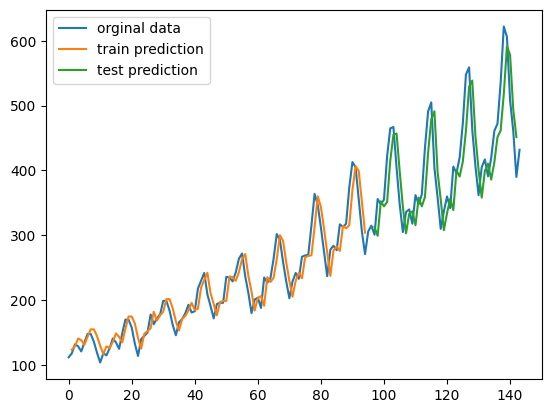

In [ ]:
plt.plot(scaler.inverse_transform(x))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.legend(['orginal data','train prediction','test prediction'])
plt.show()
